In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns

**Load Dataset**

In [6]:
file_path = "/Users/alipmaskhuri/skripsi/Dataset/finaldatalabel.csv"
df = pd.read_csv(file_path)

In [7]:
df = df.dropna()
df = df.reset_index(drop=True)

In [5]:
df

,komentar,sentiment,score
0,dulu mikir beli nyata bagai jual jadi korban p...,negative,0.989708
1,udah banyak banget korban sama kalau salah lam...,negative,0.996258
2,saran baik ambil langkah hukum lapor polisi ju...,neutral,0.500557
3,bantu viralin admin kagak beres banyak bener k...,negative,0.996809
4,marketplace berani putus kerja sama bareng jne...,negative,0.992148
...,...,...,...
16103,tadinya pernah kasi bintang 5 update terakhir ...,negative,0.987498
16104,tempat belanja favorit saran aja buat tokoped...,neutral,0.921819
16105,apabila aplikasi update terbaru pastikan berat...,neutral,0.977908
16106,tampilan pembaruan sekarang sangat bagustapi r...,negative,0.754314


In [8]:
df.groupby('sentiment').size()

sentiment
negative    8885
neutral     3860
positive    3006
dtype: int64

**Split Dataset Into Training dan Test set**

In [9]:
X = df['komentar']
y = df['sentiment']

# Pembagian pertama: 70% Train, 30% Temp (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Pembagian kedua: 20% Validation dan 10% Test dari total data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42, stratify=y_temp)

In [10]:
#mengubah kolom sentiment dari string ke int
label_mapping = {"negative": 0, "neutral" : 1, "positive": 2} 
training_labels_final = np.array([label_mapping[label] for label in y_train])
testing_labels_final = np.array([label_mapping[label] for label in y_test])

training_labels_final = np.array(training_labels_final, dtype=int)
testing_labels_final = np.array(testing_labels_final, dtype=int)

In [11]:
vocab_size = 10000
max_length = 100
embedding_dim = 100
trunc_type='post'
oov_tok = "<OOV>"

**prepare data teks dalam bentuk numerik yang dapat digunakan sebagai input ke model**

In [12]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(word_index)

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

{'<OOV>': 1, 'tokopedia': 2, 'beli': 3, 'barang': 4, 'nya': 5, 'aplikasi': 6, 'kirim': 7, 'kalau': 8, 'jadi': 9, 'gak': 10, 'belanja': 11, 'diskon': 12, 'sama': 13, 'sangat': 14, 'kurir': 15, 'mau': 16, 'promo': 17, 'aja': 18, 'banget': 19, 'lebih': 20, 'bayar': 21, 'baru': 22, 'lama': 23, 'udah': 24, 'banyak': 25, 'toko': 26, 'ongkir': 27, 'voucher': 28, 'batal': 29, 'malah': 30, 'padahal': 31, 'sistem': 32, 'kecewa': 33, 'pakai': 34, 'pake': 35, 'sekarang': 36, 'buat': 37, 'transaksi': 38, 'baik': 39, 'hari': 40, 'makin': 41, 'pesan': 42, 'selalu': 43, 'gratis': 44, 'jual': 45, 'apa': 46, 'rekomendasi': 47, 'aku': 48, 'sekali': 49, 'jelas': 50, 'paket': 51, 'harga': 52, 'dulu': 53, '1': 54, 'kali': 55, 'terus': 56, 'biaya': 57, 'pas': 58, 'kasih': 59, 'cuma': 60, 'mudah': 61, 'cek': 62, 'bagus': 63, 'pilih': 64, '2': 65, 'pihak': 66, 'akun': 67, 'update': 68, 'sih': 69, 'sering': 70, 'shopee': 71, 'bantu': 72, 'semua': 73, 'masalah': 74, 'waktu': 75, 'komplain': 76, 'cepat': 77, 'lan

In [13]:
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [14]:
# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)
print(f"Urutan padded pertama terlihat seperti ini: \n\n{padded[0]}\n")
print(f"Array Numpy dari semua urutan memiliki bentuk: {padded.shape}\n")
print(f"Ini berarti ada total urutan {padded.shape[0]} dan masing-masing memiliki ukuran {padded.shape[1]}")

Urutan padded pertama terlihat seperti ini: 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  293 7422   21  168
  470   26 7423 7424   25 7425   47  285 7426    2   41  346 7427   26
 1088  142]

Array Numpy dari semua urutan memiliki bentuk: (11025, 100)

Ini berarti ada total urutan 11025 dan masing-masing memiliki ukuran 100


**Build CNN Model**

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 96, 64)         │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 96, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,034,243 (3.95 MB)

 Trainable params: 1,034,243 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True, verbose=1
)

val_sequences = tokenizer.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences, maxlen=max_length, truncating=trunc_type)

In [48]:
num_epochs = 15
history = model.fit(
    padded, 
    training_labels_final, 
    epochs=num_epochs, 
    validation_data=(val_padded, np.array([label_mapping[label] for label in y_val])), 
    # callbacks=[early_stopping],
    batch_size=32
)

Epoch 1/15
345/345 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4046 - loss: 1.1154 - val_accuracy: 0.5641 - val_loss: 1.0353
Epoch 2/15
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5610 - loss: 0.9946 - val_accuracy: 0.5892 - val_loss: 0.9663
Epoch 3/15
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6305 - loss: 0.8822 - val_accuracy: 0.6971 - val_loss: 0.8397
Epoch 4/15
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7055 - loss: 0.7378 - val_accuracy: 0.7517 - val_loss: 0.7729
Epoch 5/15
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7430 - loss: 0.6541 - val_accuracy: 0.7765 - val_loss: 0.7112
Epoch 6/15
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8101 - loss: 0.5633 - val_accuracy: 0.7965 - val_loss: 0.6597
Epoch 7/15
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8323 - loss: 0.5006 - val_accuracy: 0.8089 - val_loss: 0.6232
Epoch 8/15
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8574 - loss: 0.4366 - val_accuracy: 0.

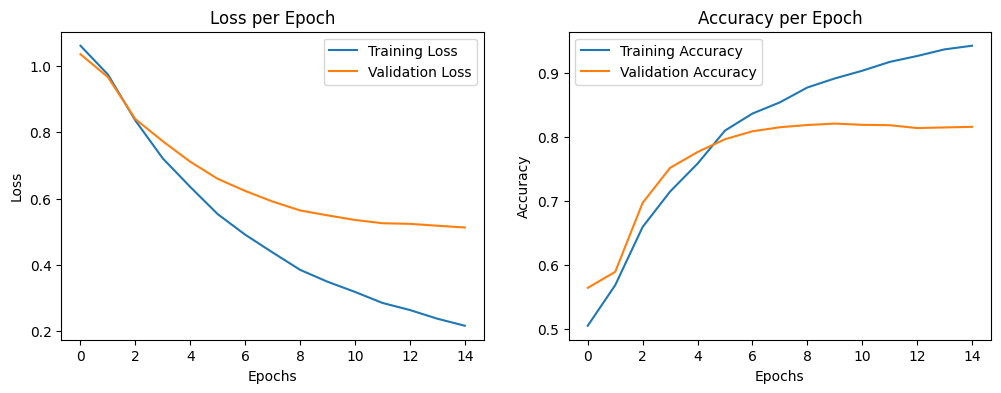

In [49]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.show()

In [53]:
test_loss, test_acc = model.evaluate(testing_padded, testing_labels_final)
print('Test accuracy:', test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8266 - loss: 0.4864
Test accuracy: 0.825507640838623


In [57]:
y_pred_prob = model.predict(testing_padded)  # Probabilitas output
y_pred_classes = np.argmax(y_pred_prob, axis=1)

test_loss, test_acc = model.evaluate(testing_padded, testing_labels_final)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8266 - loss: 0.4864
Test Loss: 0.4875
Test Accuracy: 82.55%


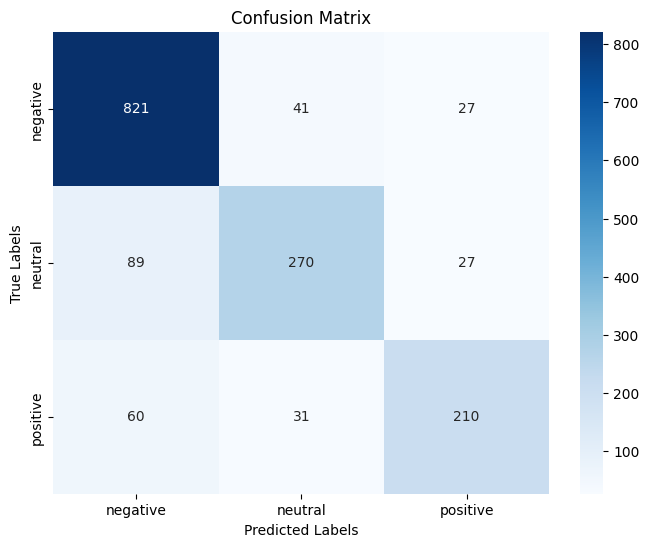

In [59]:
conf_matrix = confusion_matrix(testing_labels_final, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_mapping.keys(), 
            yticklabels=label_mapping.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
# Menampilkan confusion matrix dengan angka sebenarnya
print("Confusion Matrix:")
print(conf_matrix)

# Menghitung jumlah data aktual untuk setiap kelas
actual_counts = np.bincount(testing_labels_final)
predicted_counts = np.bincount(y_pred_classes)

# Menampilkan jumlah data per kelas (aktual vs prediksi)
for label, class_name in label_mapping.items():
    actual_count = actual_counts[class_name] if class_name < len(actual_counts) else 0
    predicted_count = predicted_counts[class_name] if class_name < len(predicted_counts) else 0
    print(f"Kelas {label}:")
    print(f"   - Jumlah aktual: {actual_count}")
    print(f"   - Jumlah prediksi: {predicted_count}")
    print(f"   - Benar terklasifikasi: {conf_matrix[class_name, class_name]}")
    print(f"   - Salah diklasifikasikan ke kelas lain: {actual_count - conf_matrix[class_name, class_name]}")
    print("-" * 50)

# Menampilkan classification report untuk analisis yang lebih detail
print("\nClassification Report:")
print(classification_report(testing_labels_final, y_pred_classes, target_names=label_mapping.keys()))


Confusion Matrix:
[[821  41  27]
 [ 89 270  27]
 [ 60  31 210]]
Kelas negative:
   - Jumlah aktual: 889
   - Jumlah prediksi: 970
   - Benar terklasifikasi: 821
   - Salah diklasifikasikan ke kelas lain: 68
--------------------------------------------------
Kelas neutral:
   - Jumlah aktual: 386
   - Jumlah prediksi: 342
   - Benar terklasifikasi: 270
   - Salah diklasifikasikan ke kelas lain: 116
--------------------------------------------------
Kelas positive:
   - Jumlah aktual: 301
   - Jumlah prediksi: 264
   - Benar terklasifikasi: 210
   - Salah diklasifikasikan ke kelas lain: 91
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.92      0.88       889
     neutral       0.79      0.70      0.74       386
    positive       0.80      0.70      0.74       301

    accuracy                           0.83      1576
   macro avg       0.81      0.77      0.79      1576
weig

In [62]:
class_report = classification_report(testing_labels_final, y_pred_classes, target_names=label_mapping.keys())
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.92      0.88       889
     neutral       0.79      0.70      0.74       386
    positive       0.80      0.70      0.74       301

    accuracy                           0.83      1576
   macro avg       0.81      0.77      0.79      1576
weighted avg       0.82      0.83      0.82      1576



In [62]:
# Ambil 10 sample acak dari X_test beserta label sentimennya
sample_data = X_test.sample(3, random_state=64).index  
sample_texts = X_test.loc[sample_data].values  
sample_labels = y_test.loc[sample_data].values  

print("\nSample Texts, Actual Labels, and Predicted Sentiments:")
for i, text in enumerate(sample_texts):
   
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=max_length, truncating=trunc_type)
    
    # Prediksi sentiment
    prediction = model.predict(padded_seq)
    sentiment_idx = np.argmax(prediction) 
    predicted_sentiment = list(label_mapping.keys())[sentiment_idx] 
    
    # Ambil label sebenarnya
    actual_sentiment = sample_labels[i] 

    print(f"Text: {text}\nActual Sentiment: {actual_sentiment}\nPredicted Sentiment: {predicted_sentiment}\n")



Sample Texts, Actual Labels, and Predicted Sentiments:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Text:  rekomendasi sih beli iphone baru online kalau toko oren lebih aman dibanding tokopedia gini tokopedia walaupun official store kok gini pelayanannya
Actual Sentiment: positive
Predicted Sentiment: positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Text: beli baru batal system trus da anggap bukan baruapasih mksdnya trus hubungin cs lama nunggu jawab gk nyambung baik layang baru aja kek lgsg trauma lihat tokopedia kek gitu
Actual Sentiment: negative
Predicted Sentiment: negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Text: kalo ngasih rating 10 tak kasih bintang 10 kecewa banget 2x transaksi batal pihak alas batal sistem padahal baru payment mana payment alfa udah ngantri udah bayar admin eh batal pihak udah 2x kalau emang gak langgar sk pas proses payment jangan lolos dong sangatt sangatt kecewaa
Actual Sentiment: negative
Predicted Sentiment: negative



In [63]:
# Contoh teks baru yang ingin Anda prediksi
new_text = ["MODUS BARU PENIPUAN berbelanja barang elektronik di tokopedia Hari pertama. Pesan barang dari Tokopedia, lalu orderan diambil oleh Gojek bernama Hardiansyah, lalu dia membatalkan. Ini oknum yang kami curigai berkomplot dan bersindikat."]

# Ubah teks baru menjadi urutan indeks menggunakan tokenizer yang sudah dilatih
new_sequences = tokenizer.texts_to_sequences(new_text)

# Lakukan padding agar panjangnya sesuai dengan yang digunakan dalam pelatihan
new_padded = pad_sequences(new_sequences, maxlen=max_length, truncating=trunc_type)

# Lakukan prediksi dengan model
prediction = model.predict(new_padded)

sentiment = "positive" if prediction[0] > 0.5 else "negative"
print(f"Prediksi: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

**Word Cloud**

In [38]:
# sentences = [words for words in df.komentar]
# sentences = ' '.join(sentences)
# Ensure all entries in 'komentar' are strings and fill NaNs with an empty string
df['komentar'] = df['komentar'].astype(str).fillna('')

# Now, joining all sentences into a single string
sentences = ' '.join(df['komentar'].tolist())


In [39]:
stopwords_id_en = stopwords.words('indonesian') + ['yg'] + stopwords.words('english')

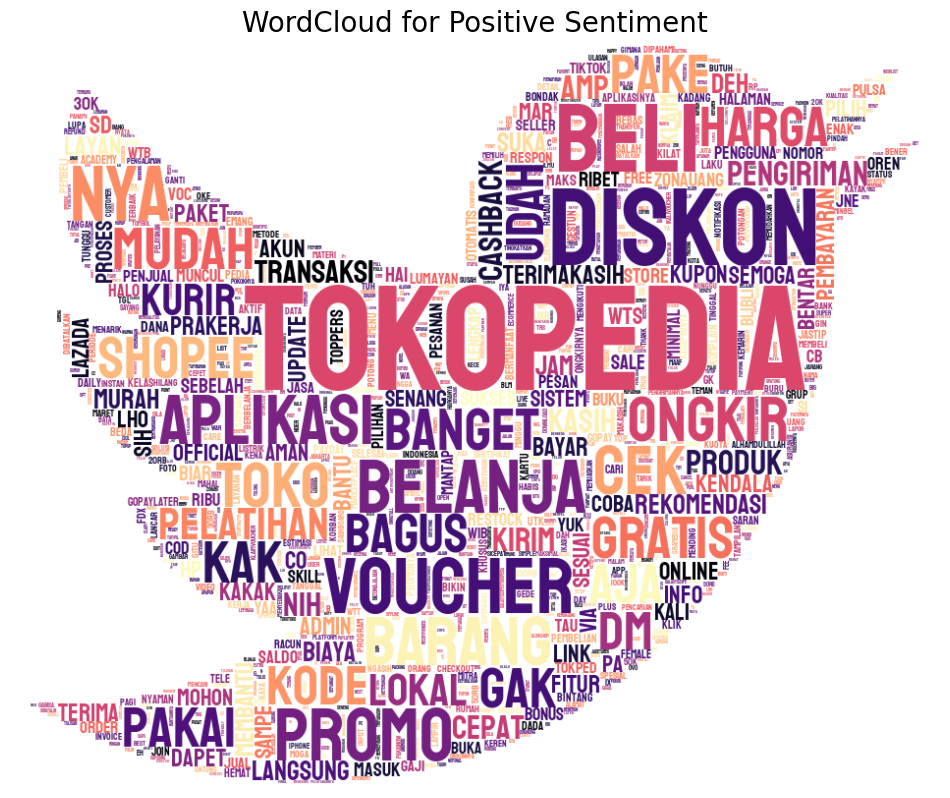

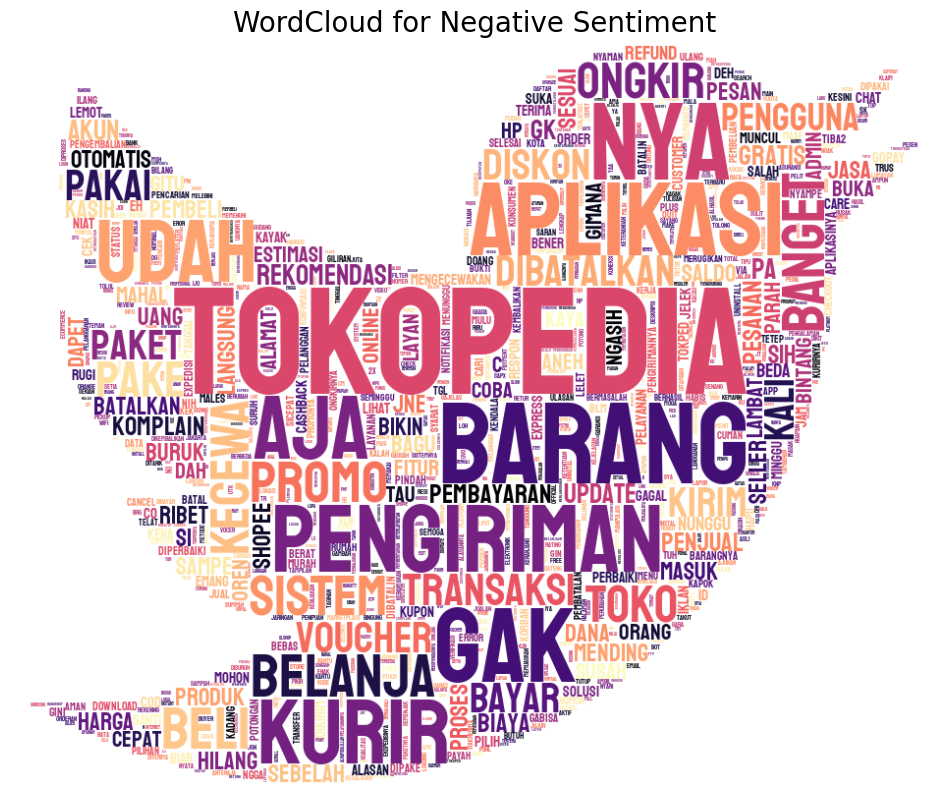

In [40]:
# Memisahkan komentar berdasarkan sentimen
positive_comments = ' '.join(df[df['sentiment'] == 'positive']['komentar'])
negative_comments = ' '.join(df[df['sentiment'] == 'negative']['komentar'])

# Memuat mask dan font
mask = np.array(Image.open('/Users/alipmaskhuri/skripsi/Dataset/wordcloud/twitter-mask.png'))
font = '/Users/alipmaskhuri/skripsi/Dataset/wordcloud/Staatliches-Regular.ttf'

# Fungsi untuk membuat wordcloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        background_color='white', stopwords=stopwords_id_en, 
        mask=mask, font_path=font, 
        random_state=42, max_words=1000,
        width=mask.shape[0], height=mask.shape[1],
        colormap='magma', collocations=False
    ).generate(text)
    
    plt.figure(figsize=(12, 12))
    plt.title(title, fontdict={'size': 20})
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Menampilkan WordCloud untuk sentimen positif dan negatif
generate_wordcloud(positive_comments, 'WordCloud for Positive Sentiment')
generate_wordcloud(negative_comments, 'WordCloud for Negative Sentiment')


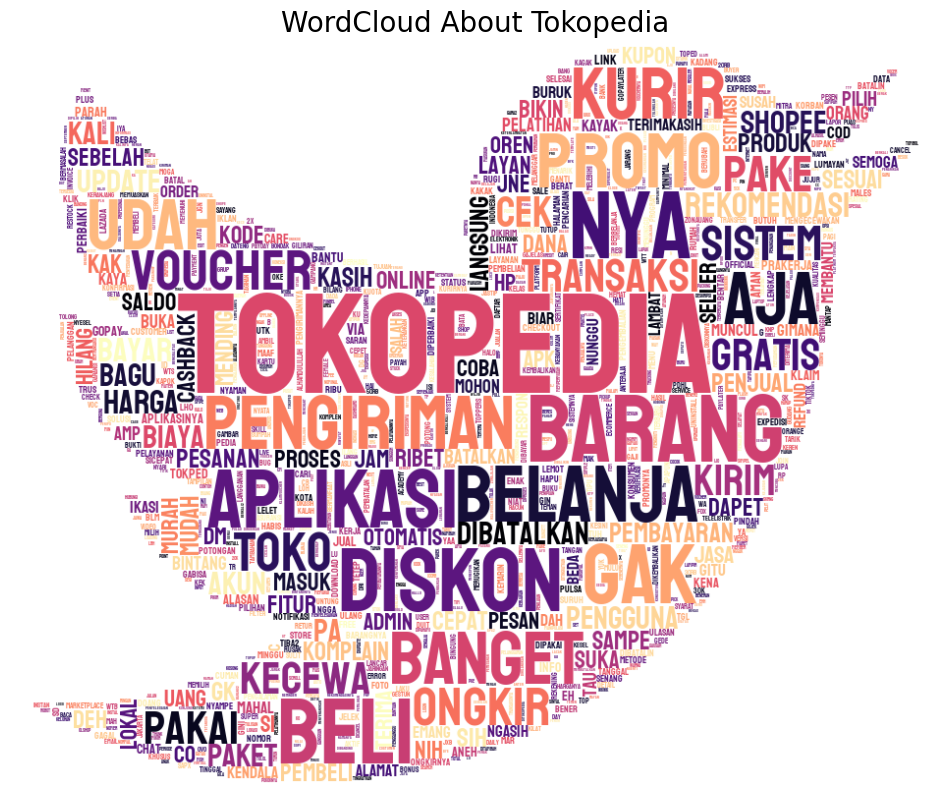

In [20]:
mask = np.array(Image.open('/Users/alipmaskhuri/skripsi/Dataset/wordcloud/twitter-mask.png'))
font = '/Users/alipmaskhuri/skripsi/Dataset/wordcloud/Staatliches-Regular.ttf'

wordcloud = WordCloud(
                background_color='white', stopwords=set(stopwords_id_en), 
                mask=mask, font_path=font, 
                random_state=42, max_words=1000,
                width=mask.shape[0], height=mask.shape[1],
                colormap='magma', collocations=False
                ).generate(sentences)

plt.figure(figsize=(12, 12))
plt.title('WordCloud About Tokopedia', fontdict={'size': 20})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Tools untuk visualisasi data embedding**

In [66]:
# Get the embedding layer from the model (i.e., first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 

(10000, 16)


In [67]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):
    word_name = reverse_word_index.get(word_num, "N/A")  # In case index is missing
    word_embedding = embedding_weights[word_num]
    out_m.write(word_name + "\n")
    out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()